In [2]:
import keras
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [4]:
data_train = pd.read_csv('D:/FashionMnist_CNN/Dataset/fashion-mnist_train.csv')
data_test = pd.read_csv('D:/FashionMnist_CNN/Dataset/fashion-mnist_test.csv')

img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

X = np.array(data_train.iloc[:, 1:])
y = to_categorical(np.array(data_train.iloc[:, 0]))

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(np.array(data_test.iloc[:, 0]))

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_val = X_val.astype('float32')
X_train /= 255
X_test /= 255
X_val /= 255

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

img_rows, img_cols = 28, 28

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)          0

In [7]:
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val))
score = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/50
188/188 [==============================] - 32s 165ms/step - loss: 0.8797 - accuracy: 0.6689 - val_loss: 0.5199 - val_accuracy: 0.8110
Epoch 2/50
188/188 [==============================] - 31s 166ms/step - loss: 0.5373 - accuracy: 0.7983 - val_loss: 0.4363 - val_accuracy: 0.8390
Epoch 3/50
188/188 [==============================] - 28s 151ms/step - loss: 0.4634 - accuracy: 0.8271 - val_loss: 0.3883 - val_accuracy: 0.8609
Epoch 4/50
188/188 [==============================] - 27s 145ms/step - loss: 0.4218 - accuracy: 0.8459 - val_loss: 0.3456 - val_accuracy: 0.8748
Epoch 5/50
188/188 [==============================] - 29s 157ms/step - loss: 0.3859 - accuracy: 0.8595 - val_loss: 0.3244 - val_accuracy: 0.8803
Epoch 6/50
188/188 [==============================] - 31s 163ms/step - loss: 0.3634 - accuracy: 0.8682 - val_loss: 0.3109 - val_accuracy: 0.8848
Epoch 7/50
188/188 [==============================] - 28s 150ms/step - loss: 0.3442 - accuracy: 0.8725 - val_loss: 0.2960 - val_ac

In [8]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.198988676071167
Test accuracy: 0.9251000285148621


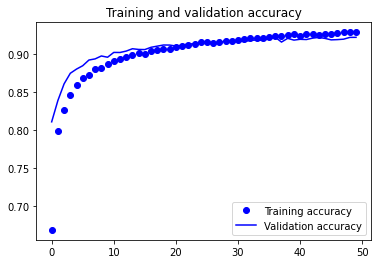

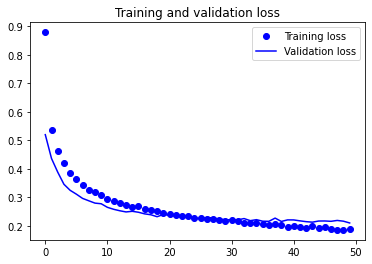

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()